## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## IMPORTING AND ANALYSIS THE DATASET

In [2]:
dataset = pd.read_csv('loan_data.csv')

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB
None


In [4]:
print(dataset.shape)

(577, 5)


In [5]:
dataset.isnull().sum()                                  #early info of the dataset

Gender             0
Married            0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Loan_Status'] = le.fit_transform(dataset['Loan_Status'])   #0 - NO, 1 - YES

In [7]:
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])             #0 - Female, 1 - Male

In [8]:
le = LabelEncoder()
dataset['Married'] = le.fit_transform(dataset['Married'])           #0 - NO, 1 - YES

In [9]:
dataset.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1,1,4583,128000.0,0
1,1,1,3000,66000.0,1
2,1,1,2583,120000.0,1
3,1,0,6000,141000.0,1
4,1,1,5417,267000.0,1


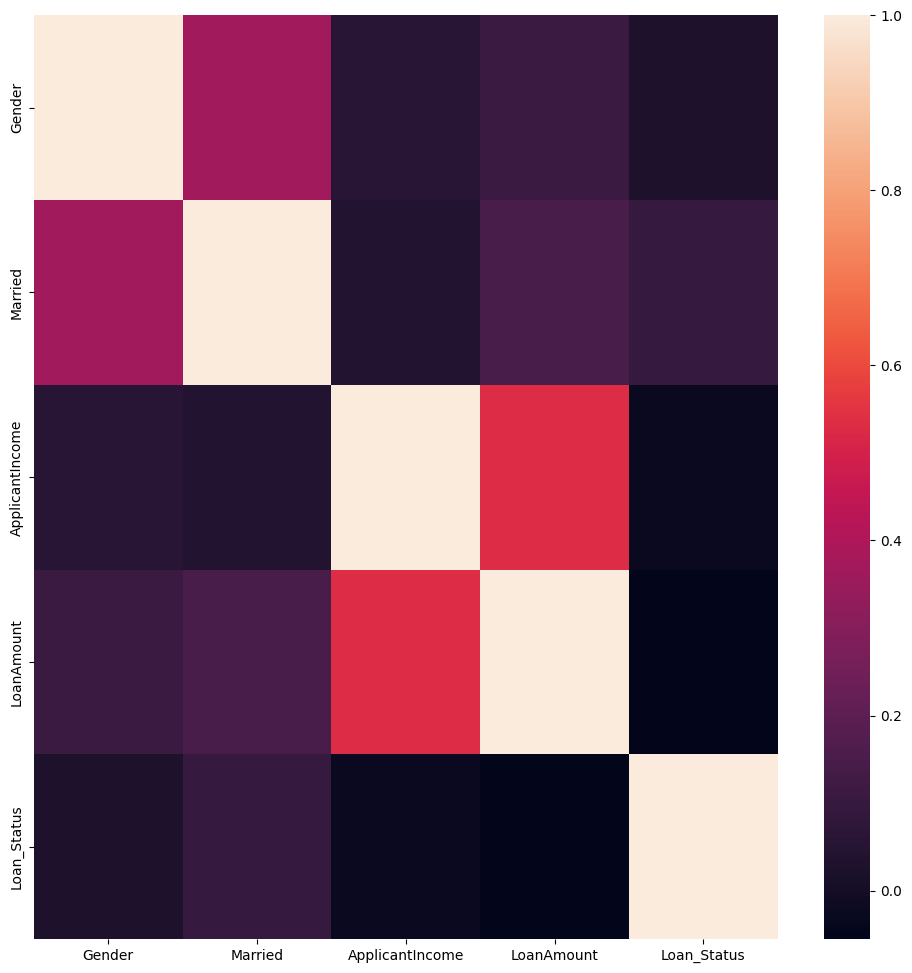

In [10]:
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 12))
sb.heatmap(corrmat)
plt.show()

## SPLITTING TRAINING SET AND TEST SET

In [11]:
features = dataset.drop(['Loan_Status'], axis=1)
target = dataset['Loan_Status']

print(features.shape)
print(target.shape)

(577, 4)
(577,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(461, 4)
(461,)
(116, 4)
(116,)


# TRAINING MODEL

### Linear Regression

In [14]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### KNN Nearest Neighbours

In [27]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

KNeighborsClassifier()

### SVM

In [ ]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)

### Kernel SVM

In [34]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

SVC(random_state=0)

### Naive Bayes

In [38]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

GaussianNB()

### Decision Tree

In [42]:
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Random Forest

In [47]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### XGBOOST

In [51]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## PREDICTING TEST SET

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print('Training Accuracy : ', metrics.roc_auc_score(y_train, classifier.predict(X_train)))
print('Validation Accuracy : ', metrics.roc_auc_score(y_test, classifier.predict(X_test)))

Training Accuracy :  0.9755244755244755
Validation Accuracy :  0.48557867834976276


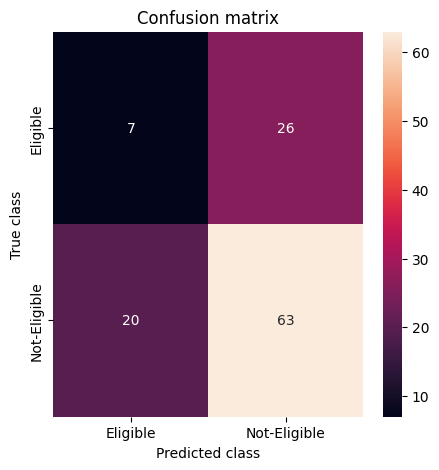


Correct:  70
Incorrect:  46


In [53]:
# Confusion matrix
LABELS = ['Eligible', 'Not-Eligible']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(5, 5))
sb.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print("\nCorrect: ", conf_matrix[0][0] + conf_matrix[1][1])
print("Incorrect: ", conf_matrix[0][1] + conf_matrix[1][0])

## Applying k-Fold Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Max accuracy: {:.5f} %".format(max(accuracies)*100))
print("Min accuracy: {:.5f} %".format(min(accuracies)*100))
print("Accuracy: {:.5f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.5f} %".format(accuracies.std()*100))

Max accuracy: 61.43791 %
Min accuracy: 57.79221 %
Accuracy: 59.87324 %
Standard Deviation: 1.53248 %


## PREDICTING SINGLE VALUE

In [26]:
gender = int(input("Male(1) / Female(0): "))
married = int(input("Married(1) / Unmarried(0): "))
ApplicantIncome = int(input("Enter ApplicantIncome: "))
LoanAmount = int(input("Enter LoanAmount: "))

if(classifier.predict(([[gender,married,ApplicantIncome,LoanAmount]]))[0]):
  print("Eligible")
else:
  print("Not-Eligible")

Male(1) / Female(0): 1
Married(1) / Unmarried(0): 0
Enter ApplicantIncome: 6000
Enter LoanAmount: 141000
Eligible


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
